# Graph Mining

- structure: node(vertex; entity), edge(link; relation; predicate), attribute
- input data: edgelist/adjacency matrix
- network 종류
  - directed v.s. undirected: 방향성의 여부
  - weighted v.s. unweighted: edge의 weight
  - multi-relational: relation type의 개수 (`nx.MultiGraph()`, `nx.MultiDiGraph()`)
  - bipartite graph (이분 그래프): 정점을 2그룹으로 나눌 수 있으되 같은 그룹의 정점끼리는 간선으로 이어지지 않은 경우
    - 학생 - 수업: 학생들이 어떤 수업을 듣고 있는지
    - 유저 - 선호 영화: 각 유저가 어떠한 영화를 선호하는지
    - 구직자 - 선호 회사: 각 구직자가 어떠한 회사를 선호하는지

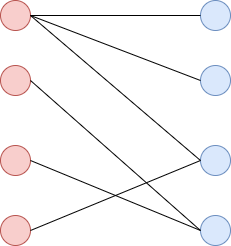

- Software: [Gephi](https://gephi.org/), [Ucinet](https://sites.google.com/site/ucinetsoftware/home), R (igraph), Python (networkx), nodeXL

# Step 1. Graph
- `networkx`를 통해 다양한 유형의 네트워크를 생성할 수 있음
  - `nx.Graph()`: undirected graph
  - `nx.DiGraph()`: directed graph

## 1) From Scratch (Edgelist)

In [ ]:
Fruits = ['apple', 'banana', 'kiwi', 'mango']
relations = [('apple', 'banana'), ('kiwi', 'apple'), ('mango', 'apple'), ('mango', 'banana')]

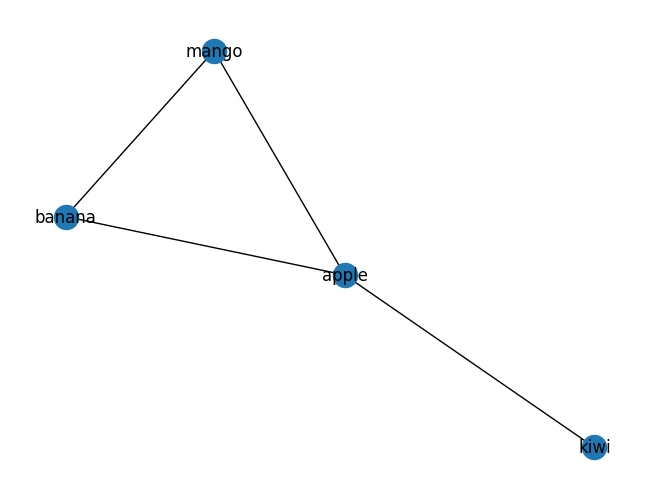

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Graph 생성
G = nx.Graph() #diGraph, MultiGraph 등 가능

# Node (vertex) 생성
G.add_nodes_from(Fruits)

# Edge (link) 생성
G.add_edges_from(relations)  # graph에 속한 모든 node들이 edgelist에 포함된 경우 add_nodes_from() 과정을 생략할 수 있음

nx.draw(G, with_labels=True)
plt.show()

In [ ]:
print('Nodes:', G.nodes)
print('Number of nodes:', nx.number_of_nodes(G))
print('Edges:', G.edges)
print('Number of nodes:', nx.number_of_edges(G))

Nodes: ['apple', 'banana', 'kiwi', 'mango']
Number of nodes: 4
Edges: [('apple', 'banana'), ('apple', 'kiwi'), ('apple', 'mango'), ('banana', 'mango')]
Number of nodes: 4


In [ ]:
print(G)

Graph with 4 nodes and 4 edges


- degree: node와 연결된 모든 edge의 수

In [ ]:
degree = nx.degree(G)
print(degree)

[('apple', 3), ('banana', 2), ('kiwi', 1), ('mango', 2)]


In [ ]:
print(list(G.neighbors('banana')))

['apple', 'mango']


- Directed graph의 경우 다음과 같이 생성 가능

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 방향이 있는 네트워크 생성
G_directed = nx.DiGraph()

G_directed.add_nodes_from(Fruits)
G_directed.add_edges_from(relations)

In [ ]:
in_degree = G_directed.in_degree()
out_degree = G_directed.out_degree()
print('in-degree:', in_degree)
print('out-degree:', out_degree)

in-degree: [('apple', 2), ('banana', 2), ('kiwi', 0), ('mango', 0)]
out-degree: [('apple', 1), ('banana', 0), ('kiwi', 1), ('mango', 2)]


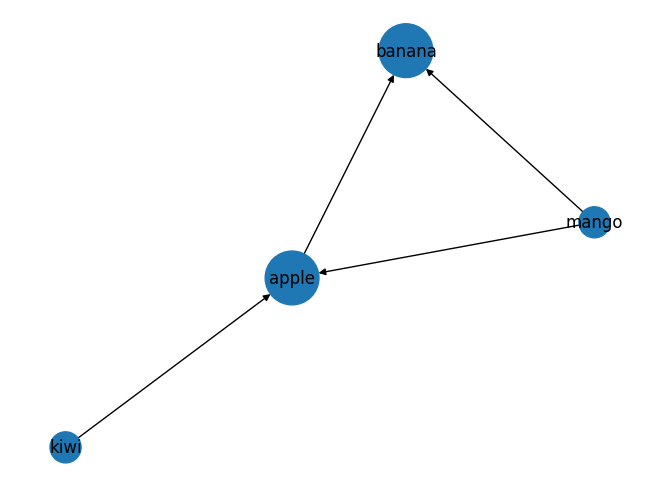

In [ ]:
# 시각화 (degree가 클수록 원의 크기도 크도록)
nx.draw(G_directed, node_size=[500 + v[1]*500 for v in in_degree], with_labels=True)

## 2) From Scratch (Adjacency matrix)

In [ ]:
# Adjacency matrix
A = nx.to_numpy_array(G)
print(A)

[[0. 1. 1. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]]


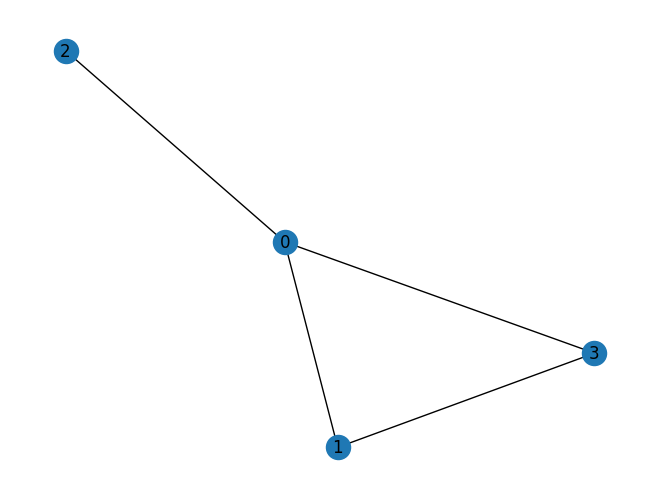

{0: 'apple', 1: 'banana', 2: 'kiwi', 3: 'mango'}


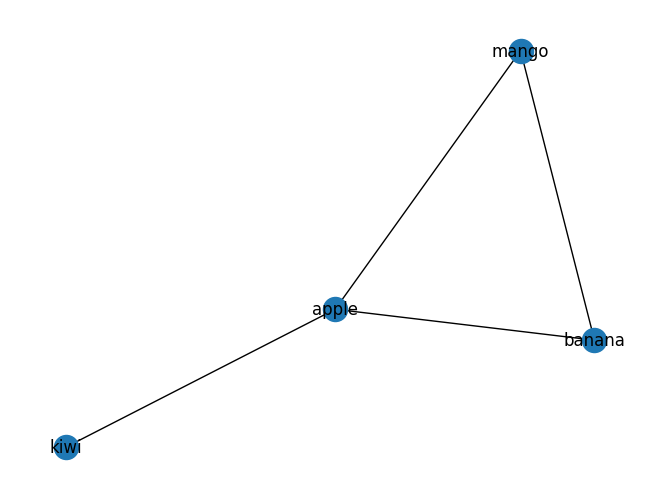

In [ ]:
G_Adjacency=nx.from_numpy_array(A) # node label이 지정되지 않은 상태 (0, 1, 2, ...)
nx.draw(G_Adjacency, with_labels=True)
plt.show()

mapping = {i: f for i, f in enumerate(Fruits)}
print(mapping) # 변경할 label 형태

H = nx.relabel_nodes(G_Adjacency, mapping)
nx.draw(H, with_labels=True)
plt.show()

## 3) From Dataset

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
data = pd.read_csv('asoiaf-all-edges.csv')

In [ ]:
data # undirected, weighted, edgelist

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3
...,...,...,...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke,Undirected,2818,4
2819,Waymar-Royce,Will-(prologue),Undirected,2819,18
2820,Weasel,Weese,Undirected,2820,6
2821,Woth,Yoren,Undirected,2821,4


In [ ]:
df = data[['Source', 'Target', 'weight']]
df.drop_duplicates(subset=['Source', 'Target', 'weight'], inplace=True) # 중복 제거

<ipython-input-29-239e198f518f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['Source', 'Target', 'weight'], inplace=True) # 중복 제거


In [ ]:
df

,Source,Target,weight
0,Addam-Marbrand,Brynden-Tully,3
1,Addam-Marbrand,Cersei-Lannister,3
2,Addam-Marbrand,Gyles-Rosby,3
3,Addam-Marbrand,Jaime-Lannister,14
4,Addam-Marbrand,Jalabhar-Xho,3
...,...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke,4
2819,Waymar-Royce,Will-(prologue),18
2820,Weasel,Weese,6
2821,Woth,Yoren,4


In [ ]:
G_data = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr='weight')

# # directed graph의 경우 create_using=nx.DiGraph() 설정
# G = nx.from_pandas_edgelist(df,  source='Source', target='Target', edge_attr='weight', create_using=nx.DiGraph())

- Node: 왕좌의 게임의 인물
- Edge: 인물들 간의 친밀도

In [ ]:
print(G_data)

Graph with 796 nodes and 2823 edges


In [ ]:
G_data.nodes

NodeView(('Addam-Marbrand', 'Brynden-Tully', 'Cersei-Lannister', 'Gyles-Rosby', 'Jaime-Lannister', 'Jalabhar-Xho', 'Joffrey-Baratheon', 'Kevan-Lannister', 'Lyle-Crakehall', 'Oberyn-Martell', 'Tyrion-Lannister', 'Tywin-Lannister', 'Varys', 'Aegon-Frey-(son-of-Stevron)', 'Catelyn-Stark', 'Robb-Stark', 'Stevron-Frey', 'Walder-Frey', 'Aegon-I-Targaryen', 'Daenerys-Targaryen', 'Eddard-Stark', 'Harren-Hoare', 'Nan', 'Rhaenys-Targaryen', 'Stannis-Baratheon', 'Torrhen-Stark', 'Visenya-Targaryen', 'Aegon-Targaryen-(son-of-Rhaegar)', 'Elia-Martell', 'Franklyn-Flowers', 'Haldon', 'Harry-Strickland', 'Jon-Connington', 'Lemore', 'Rhaegar-Targaryen', 'Rhaenys-Targaryen-(daughter-of-Rhaegar)', 'Rolly-Duckfield', 'Viserys-Targaryen', 'Yandry', 'Ysilla', 'Aegon-V-Targaryen', 'Aemon-Targaryen-(Maester-Aemon)', 'Aemon-Targaryen-(Dragonknight)', 'Alleras', 'Alliser-Thorne', 'Bowen-Marsh', 'Chett', 'Clydas', 'Cotter-Pyke', 'Daeron-II-Targaryen', 'Dareon', 'Denys-Mallister', 'Donal-Noye', 'Eddison-Tollett',

In [ ]:
G_data.edges

EdgeView([('Addam-Marbrand', 'Brynden-Tully'), ('Addam-Marbrand', 'Cersei-Lannister'), ('Addam-Marbrand', 'Gyles-Rosby'), ('Addam-Marbrand', 'Jaime-Lannister'), ('Addam-Marbrand', 'Jalabhar-Xho'), ('Addam-Marbrand', 'Joffrey-Baratheon'), ('Addam-Marbrand', 'Kevan-Lannister'), ('Addam-Marbrand', 'Lyle-Crakehall'), ('Addam-Marbrand', 'Oberyn-Martell'), ('Addam-Marbrand', 'Tyrion-Lannister'), ('Addam-Marbrand', 'Tywin-Lannister'), ('Addam-Marbrand', 'Varys'), ('Brynden-Tully', 'Arya-Stark'), ('Brynden-Tully', 'Catelyn-Stark'), ('Brynden-Tully', 'Daven-Lannister'), ('Brynden-Tully', 'Edmure-Tully'), ('Brynden-Tully', 'Edwyn-Frey'), ('Brynden-Tully', 'Emmon-Frey'), ('Brynden-Tully', 'Hoster-Tully'), ('Brynden-Tully', 'Jaime-Lannister'), ('Brynden-Tully', 'Lyle-Crakehall'), ('Brynden-Tully', 'Lysa-Arryn'), ('Brynden-Tully', 'Nestor-Royce'), ('Brynden-Tully', 'Rickard-Karstark'), ('Brynden-Tully', 'Robb-Stark'), ('Brynden-Tully', 'Ryman-Frey'), ('Brynden-Tully', 'Theon-Greyjoy'), ('Brynden-Tu

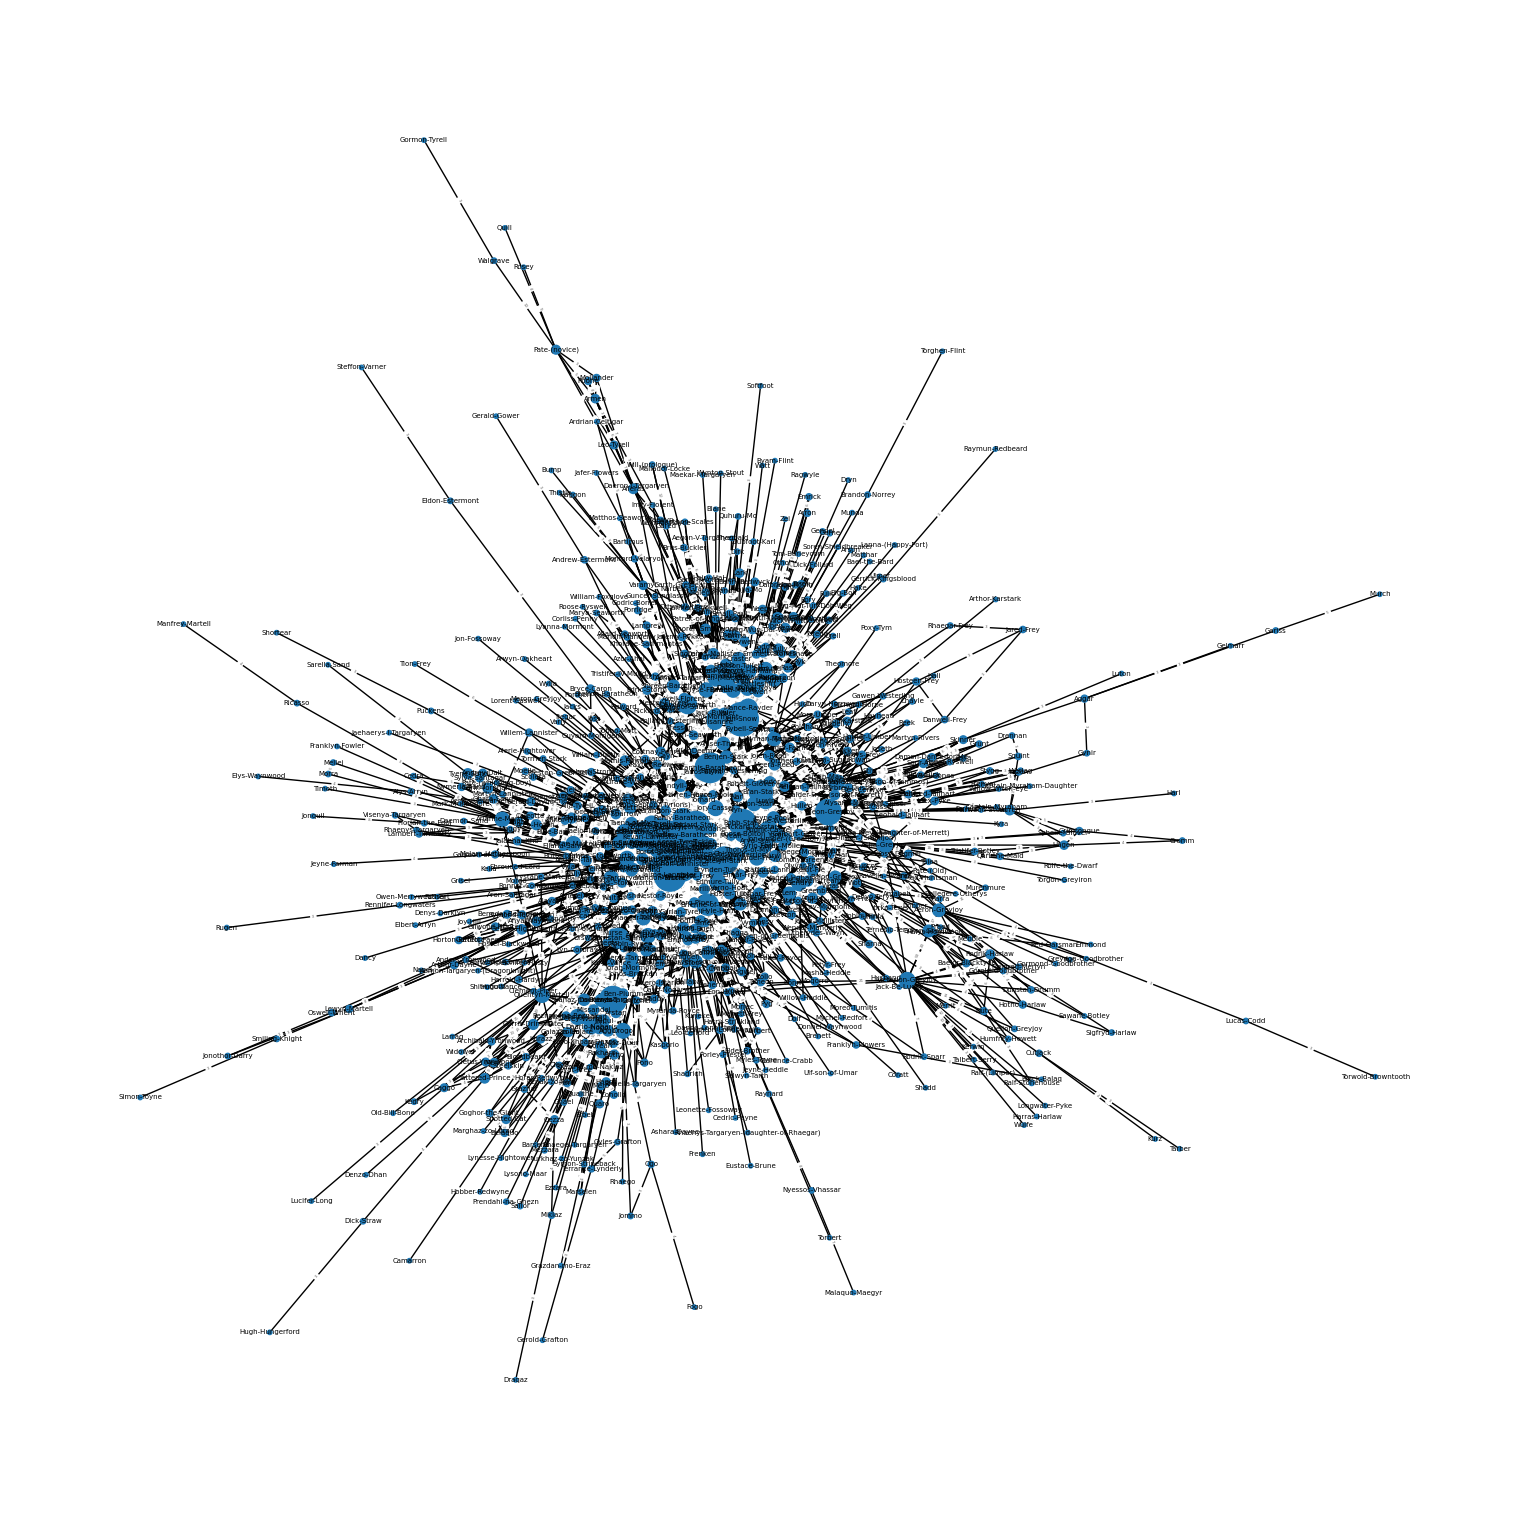

In [ ]:
plt.figure(figsize=(15, 15))

degree = nx.degree(G_data)
pos=nx.spring_layout(G_data)
nx.draw(G_data, pos, with_labels=True, node_size=[5 + v[1]*5 for v in degree], font_size = 5) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
edge_weight = nx.get_edge_attributes(G_data, 'weight')
nx.draw_networkx_edge_labels(G_data, pos, edge_labels = edge_weight, alpha=0.6, font_size=3) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edge_labels.html
plt.show()

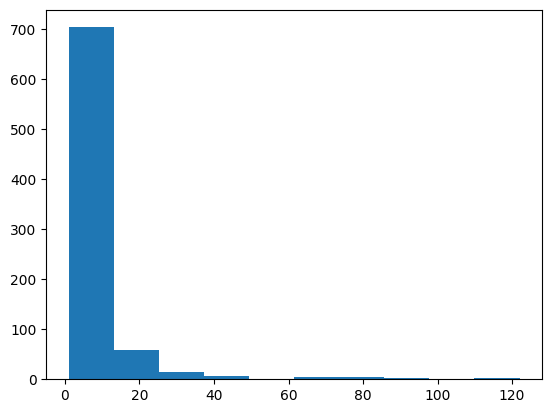

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(dict(degree).values())
plt.show()

# Step 2. Attribute

## 1) Edge attribute (weight)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G_weighted = nx.Graph()
G_weighted.add_nodes_from(Fruits)

In [ ]:
# Case 1
weighted_relations = [('apple', 'banana', {'weight': 7}), ('kiwi', 'apple', {'weight': 4}), ('mango', 'apple', {'weight': 3}), ('mango', 'banana', {'weight': 5})]
G_weighted.add_edges_from(weighted_relations)
print(G_weighted.edges(data=True))

[('apple', 'banana', {'weight': 7}), ('apple', 'kiwi', {'weight': 4}), ('apple', 'mango', {'weight': 3}), ('banana', 'mango', {'weight': 5})]


In [ ]:
# Case 2
G_weighted['apple']['banana']['weight']=5
G_weighted['apple']['kiwi']['weight']=2
G_weighted['apple']['mango']['weight']=3
G_weighted['banana']['mango']['weight']=4
print(G_weighted.edges(data=True))

[('apple', 'banana', {'weight': 5}), ('apple', 'kiwi', {'weight': 2}), ('apple', 'mango', {'weight': 3}), ('banana', 'mango', {'weight': 4})]


In [ ]:
nx.to_numpy_array(G_weighted)

array([[0., 5., 2., 3.],
       [5., 0., 0., 4.],
       [2., 0., 0., 0.],
       [3., 4., 0., 0.]])

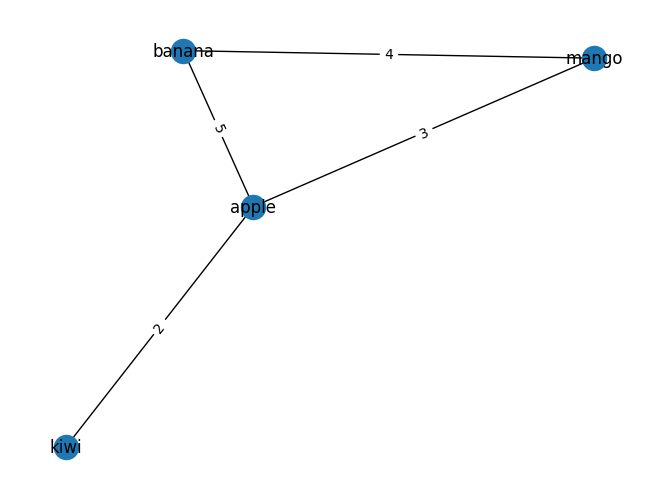

In [ ]:
labels = nx.get_edge_attributes(G_weighted, 'weight')

pos = nx.spring_layout(G_weighted)
nx.draw(G_weighted, pos, with_labels=True)
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=labels)

plt.show()

In [ ]:
print('전체 shortest path:\n',nx.shortest_path(G))
print('banana to kiwi:',nx.shortest_path(G, 'banana', 'kiwi'))
# print('banana to kiwi:',nx.shortest_path(G_weighted, 'banana', 'kiwi', weight='weight')) # 여러 route가 있을 때 weight을 고려하여 shortest path 계산

전체 shortest path:
 {'apple': {'apple': ['apple'], 'banana': ['apple', 'banana'], 'kiwi': ['apple', 'kiwi'], 'mango': ['apple', 'mango']}, 'banana': {'banana': ['banana'], 'apple': ['banana', 'apple'], 'mango': ['banana', 'mango'], 'kiwi': ['banana', 'apple', 'kiwi']}, 'kiwi': {'kiwi': ['kiwi'], 'apple': ['kiwi', 'apple'], 'banana': ['kiwi', 'apple', 'banana'], 'mango': ['kiwi', 'apple', 'mango']}, 'mango': {'mango': ['mango'], 'apple': ['mango', 'apple'], 'banana': ['mango', 'banana'], 'kiwi': ['mango', 'apple', 'kiwi']}}
banana to kiwi: ['banana', 'apple', 'kiwi']


## 2) Node attribute

In [ ]:
print('Attribute 부여하기 전:', G.nodes['kiwi'])

G.nodes['kiwi']['kind'] = 'fruit'
print('Attribute 부여한 후:', G.nodes['kiwi'])

print(G.nodes(data=True))

Attribute 부여하기 전: {}
Attribute 부여한 후: {'kind': 'fruit'}
[('apple', {}), ('banana', {}), ('kiwi', {'kind': 'fruit'}), ('mango', {})]


In [ ]:
G.add_nodes_from(Fruits, kind='fruit') # kind라는 attribute에 fruit 값 추가
print(G.nodes(data=True))

[('apple', {'kind': 'fruit'}), ('banana', {'kind': 'fruit'}), ('kiwi', {'kind': 'fruit'}), ('mango', {'kind': 'fruit'})]


# Step 3. Graph Metric

## 1) Structure
- diameter: 네트워크에서 가장 멀리 연결된 pair의 거리
  - 모든 노드 쌍에 대해 Shortest Path를 계산 후, 그 중 가장 큰 값을 가지는 Path의 길이
- density: 모든 edge의 개수와 실제 edge 수(k)의 비
  - undirected: $k/n(n-1)/2$
  - directed: $k/n(n-1)$
- reciprocity: 주고 받는 비율 (i.e., A가 B를 친구로 지명하였을 때, B가 A를 친구로 지명)
  - directed graph에서만 의미가 있음
- transitivity: 3 이상의 관계에서 연결된 비율 (i.e., A가 B를 친구로 지명하고, B는 C를 친구로 지명했을 때, A가 C를 친구로 지명)
- centrality: 중앙성(해당 노드가 기준으로부터 얼마나 중요한가)
  - betweeness: 사이중앙성(얼마나 많은 연관이 있는가)
  - closeness: 얼마나 빨리 도달할 수 있는가
  - ev: 얼마나 영향력이 있는가(주변 노드의 힘을 바탕으로)

In [ ]:
print('diamter:', nx.diameter(G_data))
print('density:', nx.density(G_data))
print('transitivity:', nx.transitivity(G_data))
print('reciprocity:', nx.reciprocity(G_data))

diamter: 9
density: 0.008921968332227173
transitivity: 0.2090366938564282
reciprocity: 0.0


- directed graph의 경우

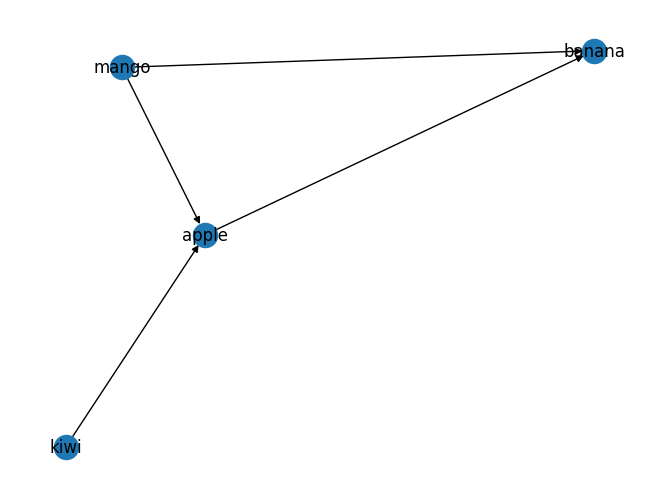

In [ ]:
nx.draw(G_directed, with_labels=True)

In [ ]:
'''
directed graph에서는 이동에 있어서 양방향을 모두 따지기 때문에 그냥 nx.diameter(G)를 할 경우 다음과 같은 오류 발생

NetworkXError: Found infinite path length because the digraph is not strongly connected
'''

print('diamter:', nx.diameter(nx.to_undirected(G_directed)))
print('density:', nx.density(nx.to_undirected(G_directed)))
print('transitivity:', nx.transitivity(G_directed))
print('reciprocity:', nx.reciprocity(G_directed))

diamter: 2
density: 0.6666666666666666
transitivity: 0.5
reciprocity: 0.0


In [ ]:
#asoiaf-all-edges.csv를 읽어서 그래프를 만들고 분석하기
#weight >= 10
#density, transitivity, reciprociy
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

ed = pd.read_csv("asoiaf-all-edges.csv")
ed = ed[ed.weight >= 10]
aae = nx.from_pandas_edgelist(ed, source='Source', target='Target', edge_attr='weight')

#print('diamter:', nx.diameter(nx.to_undirected(aae))) #끊어진 부분이 있어 에러가 뜬다.
print('density:', nx.density(nx.to_undirected(aae)))
print('transitivity:', nx.transitivity(aae))
print('reciprocity:', nx.reciprocity(aae))

density: 0.01705307530178195
transitivity: 0.25382670973177923
reciprocity: 0.0


## 2) Centrality
- Degree centrality (연결 중심성): 마당발이 누구인가? 누가 직접적 이웃이 가장 많은가?
  - Normalized degree centrality: 표준화를 위해 전체를 N-1로 나눠줌
- Betweenness centrality (매개 중심성): 얼마나 많은 최단 경로가 특정 노드를 지나는가?
  - Broker 역할을 하는 node를 찾을 수 있음
  - $C_B(i)=\sum_{j<k}g_{jk}(i)/g_{jk}$ where $g_{jk}$: jk를 연결하는 geodesics 수, 그 중 $g_{jk}(i)$: node i가 포함되어있는 경우
  - Normalized betweeness centrality: $C_B^*(i)=\frac{C_B(i)}{\frac{(N-1)(N-2)}{2}}$
- Closeness centrality (근접 중심성): 누가 다른 노드들에 대한 최단거리를 가지는가? (다른 노드들에 가장 빨리 정보를 확산시킬 수 있는가?)
  - 모든 다른 노드들과의 거리가 가장 가까운 노드가 중요한 노드
  - $C_C(i)=[\sum_{j=1}^{N-1}d(i,j)]^{-1}$
  - Normalized closness centrality: $C_C^*(i)=(N-1)C_C(i)$
- Eigenvector centrality (Bonacich power centrality): 누가 중요한 노드들과 연결이 많이 되어 있는가?
  - 연결된 이웃의 중요도에 가중치를 부여
  - $C_E(v_i) \propto\sum_{v_j \in N_i}A_{ij}C_E(v_j)$, $A\mathbf{x}=\lambda \mathbf{x}$

- [참고](https://chaelist.github.io/docs/network_analysis/network_basics/#neighbors--degree)
- 이 외에 Katz centrality, PageRank [참고](https://bab2min.tistory.com/554)


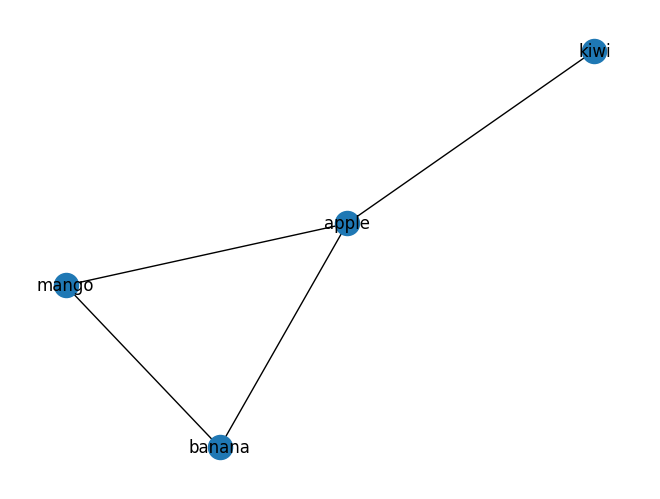

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
print('degree centrality:\n', nx.degree_centrality(G))
print('betweenness centrality:\n', nx.betweenness_centrality(G))
print('closeness centrality:\n', nx.closeness_centrality(G))
print('eigenvector centrality:\n', nx.eigenvector_centrality(G))

degree centrality:
 {'apple': 1.0, 'banana': 0.6666666666666666, 'kiwi': 0.3333333333333333, 'mango': 0.6666666666666666}
betweenness centrality:
 {'apple': 0.6666666666666666, 'banana': 0.0, 'kiwi': 0.0, 'mango': 0.0}
closeness centrality:
 {'apple': 1.0, 'banana': 0.75, 'kiwi': 0.6, 'mango': 0.75}
eigenvector centrality:
 {'apple': 0.6116286437343044, 'banana': 0.5227204550943347, 'kiwi': 0.28184579793865727, 'mango': 0.5227204550943347}


- 앞서 불러온 데이터셋을 사용하여 이후 실습을 진행

In [ ]:
#asoiaf-all-edges.csv를 읽어서 그래프를 만들고 분석하기
#weight < 10
#centrality 4가지
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

aae = pd.read_csv("asoiaf-all-edges.csv")
aae = aae[aae.weight < 10]
fpe = nx.from_pandas_edgelist(aae, source='Source', target='Target', edge_attr='weight')

#nx.draw(fpe, with_labels=True)

dcen = nx.degree_centrality(fpe)
bcen = nx.betweenness_centrality(fpe)
ccen = nx.closeness_centrality(fpe)
ecen = nx.eigenvector_centrality(fpe)

In [ ]:
deg_cen = nx.degree_centrality(G_data)
bet_cen = nx.betweenness_centrality(G_data)
clo_cen = nx.closeness_centrality(G_data)
eig_cen = nx.eigenvector_centrality(G_data)

In [ ]:
# 각 centrality별 가장 값이 높은 3개의 node 추출
print('degree centrality:\n', sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('betweenness centrality:\n', sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('closeness centrality:\n', sorted(clo_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('eigenvector centrality:\n', sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)[0:3])

degree centrality:
 [('Tyrion-Lannister', 0.15345911949685534), ('Jon-Snow', 0.14339622641509434), ('Jaime-Lannister', 0.1270440251572327)]
betweenness centrality:
 [('Jon-Snow', 0.1921196196835449), ('Tyrion-Lannister', 0.1621910961115984), ('Daenerys-Targaryen', 0.11841801916269204)]
closeness centrality:
 [('Tyrion-Lannister', 0.4763331336129419), ('Robert-Baratheon', 0.4592720970537262), ('Eddard-Stark', 0.455848623853211)]
eigenvector centrality:
 [('Tyrion-Lannister', 0.25155836369081985), ('Cersei-Lannister', 0.2357712102434476), ('Jaime-Lannister', 0.22633850166044056)]


## 3) Community Detection
- 연결 밀도가 높은 집단끼리 묶어서 분석
  - community: modularity가 높은 집단
  - [modularity]((https://mons1220.tistory.com/93)): 커뮤니티 내부에 펼쳐져 있는 링크들이 무작위적인 연결들과 비교했을 때 얼마나 더 많은지 정량화한 지표
- algorithm: [Louvain algorithm](https://lsjsj92.tistory.com/587)
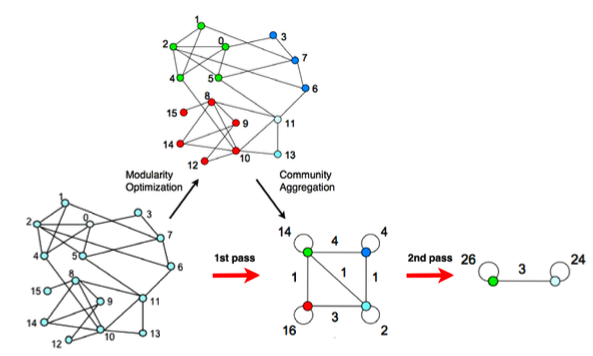
- 추가적인 [참고 코드](https://towardsdatascience.com/louvains-algorithm-for-community-detection-in-python-95ff7f675306)

<ipython-input-54-c9d064c8e3bb>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


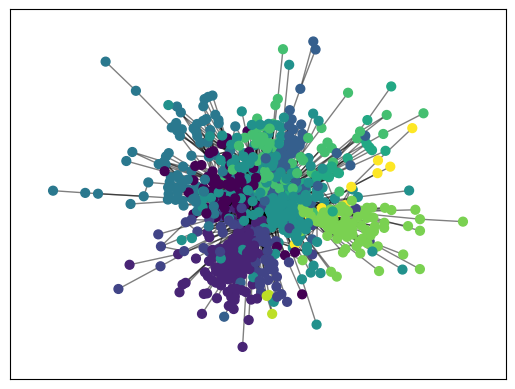

In [ ]:
import community.community_louvain as cl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

partition = cl.best_partition(G_data)

pos = nx.spring_layout(G_data)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_data, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_data, pos, alpha=0.5)
plt.show()

In [ ]:
pos

## 4) Link Prediction
- 노드 간 missing/latent link 예측
  - 구조적 유사성 지표를 통해 두 노드 간 유사한 정보를 기반으로 예측
- [indices](https://medium.com/neo4j/link-prediction-with-neo4j-part-1-an-introduction-713aa779fd9): Common Neighbors, Adamic Adar, Preferential Attachment, Katz 등 [networkx](https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html)에서 일부 link prediction metrics 제공

In [ ]:
common_neighbor = [(e[0], e[1], len(list(nx.common_neighbors(G_data, e[0], e[1])))) for e in nx.non_edges(G_data)]
common_neighbor.sort(key=lambda x: x[-1], reverse=True)
common_neighbor[:10]

[('Stannis-Baratheon', 'Arya-Stark', 20),
 ('Brienne-of-Tarth', 'Eddard-Stark', 19),
 ('Jaime-Lannister', 'Bran-Stark', 19),
 ('Brienne-of-Tarth', 'Petyr-Baelish', 18),
 ('Stannis-Baratheon', 'Bran-Stark', 18),
 ('Jon-Snow', 'Petyr-Baelish', 16),
 ('Loras-Tyrell', 'Arya-Stark', 16),
 ('Brienne-of-Tarth', 'Arya-Stark', 16),
 ('Tommen-Baratheon', 'Catelyn-Stark', 16),
 ('Margaery-Tyrell', 'Stannis-Baratheon', 16)]

In [ ]:
'''
공통 이웃이 많은 경우 더 연결될 가능성이 높음
'''
common_neighbor = nx.common_neighbor_centrality(G_data)
common_neighbor = list(common_neighbor)
common_neighbor.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in common_neighbor[:10]:
    print(f"({u}, {v}) -> {p}")

(Stannis-Baratheon, Arya-Stark) -> 95.59999999999998
(Brienne-of-Tarth, Eddard-Stark) -> 94.79999999999998
(Jaime-Lannister, Bran-Stark) -> 94.79999999999998
(Brienne-of-Tarth, Petyr-Baelish) -> 93.99999999999999
(Stannis-Baratheon, Bran-Stark) -> 93.99999999999999
(Jon-Snow, Petyr-Baelish) -> 92.39999999999998
(Loras-Tyrell, Arya-Stark) -> 92.39999999999998
(Brienne-of-Tarth, Arya-Stark) -> 92.39999999999998
(Tommen-Baratheon, Catelyn-Stark) -> 92.39999999999998
(Margaery-Tyrell, Stannis-Baratheon) -> 92.39999999999998


In [ ]:
'''
노드가 공통 이웃을 통해 다른 노드에 보낼 수 있는 정보를 기반으로 측정
'''
aa = nx.adamic_adar_index(G_data)
aa = list(aa)
aa.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in aa[:10]:
    print(f"({u}, {v}) -> {p}")

(Jaime-Lannister, Bran-Stark) -> 5.425753364906164
(Brienne-of-Tarth, Eddard-Stark) -> 5.2666498235243715
(Stannis-Baratheon, Arya-Stark) -> 5.176877972330855
(Brienne-of-Tarth, Petyr-Baelish) -> 4.951472013301842
(Brienne-of-Tarth, Arya-Stark) -> 4.782766929583283
(Stannis-Baratheon, Bran-Stark) -> 4.718412597540896
(Margaery-Tyrell, Stannis-Baratheon) -> 4.698335927054334
(Bronn, Sansa-Stark) -> 4.28217696015498
(Loras-Tyrell, Arya-Stark) -> 4.278897331935221
(Tommen-Baratheon, Catelyn-Stark) -> 4.1139196142529775


In [ ]:
'''
degree가 높은 노드들이 결국은 연결될 것이라는 관점
'''
pa = nx.preferential_attachment(G_data)
pa = list(pa)
pa.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in pa[:10]:
    print(f"({u}, {v}) -> {p}")

(Jon-Snow, Daenerys-Targaryen) -> 8322
(Stannis-Baratheon, Arya-Stark) -> 7476
(Jaime-Lannister, Daenerys-Targaryen) -> 7373
(Daenerys-Targaryen, Stannis-Baratheon) -> 6497
(Cersei-Lannister, Theon-Greyjoy) -> 6402
(Daenerys-Targaryen, Arya-Stark) -> 6132
(Catelyn-Stark, Daenerys-Targaryen) -> 5475
(Daenerys-Targaryen, Sansa-Stark) -> 5475
(Jon-Snow, Tywin-Lannister) -> 5472
(Jaime-Lannister, Bran-Stark) -> 5454


# facebook_combined에 대해 분석

In [ ]:
G = nx.read_edgelist( "facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

In [ ]:
print(G)

Graph with 4039 nodes and 88234 edges


In [ ]:
#위의 그래프 G에 대ㅎㅐ서
#density, reciprocity, transitivity
#degree, contrality 4가지

#nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr='weight')

print('density:', nx.density(G))
print('transitivity:', nx.transitivity(G))
print('reciprocity:', nx.reciprocity(G))

deg = nx.degree(G)
print("degree: ", deg)

#in_degree = G.in_degree()
#out_degree = G.out_degree()
#print('in-degree:', in_degree)
#print('out-degree:', out_degree)

deg_cen = nx.degree_centrality(G)
bet_cen = nx.betweenness_centrality(G)
clo_cen = nx.closeness_centrality(G)
eig_cen = nx.eigenvector_centrality(G)


density: 0.010819963503439287
transitivity: 0.5191742775433075
reciprocity: 0.0
degree:  [(0, 347), (1, 17), (2, 10), (3, 17), (4, 10), (5, 13), (6, 6), (7, 20), (8, 8), (9, 57), (10, 10), (11, 1), (12, 1), (13, 31), (14, 15), (15, 1), (16, 9), (17, 13), (18, 1), (19, 16), (20, 15), (21, 65), (22, 11), (23, 17), (24, 16), (25, 69), (26, 68), (27, 5), (28, 13), (29, 13), (30, 17), (31, 23), (32, 6), (33, 2), (34, 5), (35, 2), (36, 11), (37, 1), (38, 9), (39, 15), (40, 44), (41, 24), (42, 2), (43, 1), (44, 6), (45, 12), (46, 5), (47, 2), (48, 22), (49, 4), (50, 11), (51, 7), (52, 2), (53, 31), (54, 8), (55, 17), (56, 78), (57, 15), (58, 12), (59, 19), (60, 8), (61, 3), (62, 26), (63, 6), (64, 7), (65, 12), (66, 15), (67, 76), (68, 9), (69, 10), (70, 2), (71, 3), (72, 24), (73, 10), (74, 1), (75, 14), (76, 3), (77, 6), (78, 9), (79, 12), (80, 23), (81, 3), (82, 34), (83, 7), (84, 13), (85, 14), (86, 6), (87, 13), (88, 20), (89, 8), (90, 2), (91, 8), (92, 21), (93, 8), (94, 22), (95, 6), (

DegreeView({0: 347, 1: 17, 2: 10, 3: 17, 4: 10, 5: 13, 6: 6, 7: 20, 8: 8, 9: 57, 10: 10, 11: 1, 12: 1, 13: 31, 14: 15, 15: 1, 16: 9, 17: 13, 18: 1, 19: 16, 20: 15, 21: 65, 22: 11, 23: 17, 24: 16, 25: 69, 26: 68, 27: 5, 28: 13, 29: 13, 30: 17, 31: 23, 32: 6, 33: 2, 34: 5, 35: 2, 36: 11, 37: 1, 38: 9, 39: 15, 40: 44, 41: 24, 42: 2, 43: 1, 44: 6, 45: 12, 46: 5, 47: 2, 48: 22, 49: 4, 50: 11, 51: 7, 52: 2, 53: 31, 54: 8, 55: 17, 56: 78, 57: 15, 58: 12, 59: 19, 60: 8, 61: 3, 62: 26, 63: 6, 64: 7, 65: 12, 66: 15, 67: 76, 68: 9, 69: 10, 70: 2, 71: 3, 72: 24, 73: 10, 74: 1, 75: 14, 76: 3, 77: 6, 78: 9, 79: 12, 80: 23, 81: 3, 82: 34, 83: 7, 84: 13, 85: 14, 86: 6, 87: 13, 88: 20, 89: 8, 90: 2, 91: 8, 92: 21, 93: 8, 94: 22, 95: 6, 96: 9, 97: 3, 98: 49, 99: 13, 100: 9, 101: 19, 102: 6, 103: 16, 104: 32, 105: 14, 106: 8, 107: 1045, 108: 13, 109: 37, 110: 5, 111: 14, 112: 3, 113: 40, 114: 1, 115: 21, 116: 17, 117: 6, 118: 36, 119: 62, 120: 4, 121: 12, 122: 63, 123: 18, 124: 4, 125: 4, 126: 7, 127: 16

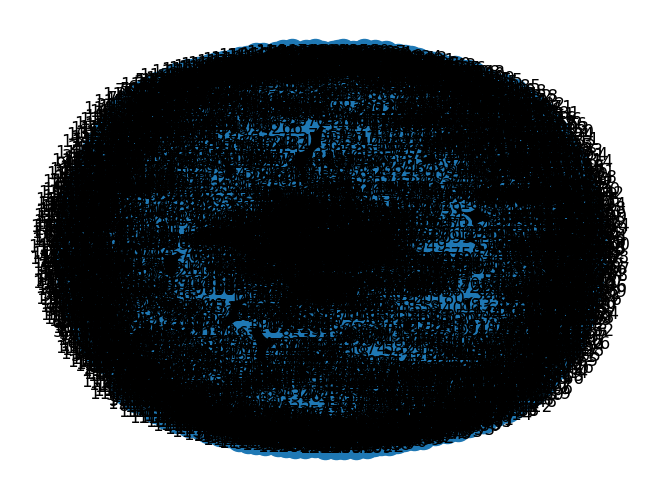

In [ ]:
cora = nx.read_edgelist( "cora.cites", create_using=nx.DiGraph(), nodetype=int)
nx.draw(cora, with_labels=True)

In [ ]:
nx.drawing.layout #에 레이아웃들이 다양하게 있다

<module 'networkx.drawing.layout' from '/usr/local/lib/python3.10/dist-packages/networkx/drawing/layout.py'>

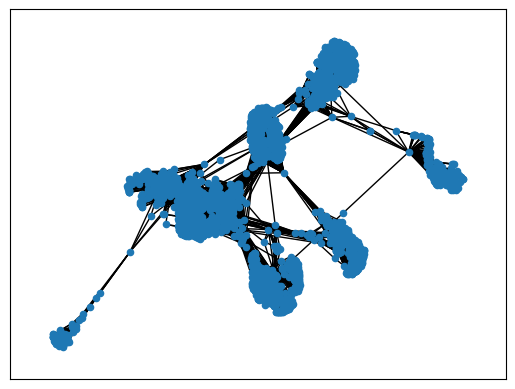

In [ ]:
nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels=False, node_size=20)

https://networkrepository.com/

In [ ]:
G = nx.read_edgelist( "inf-openflights.edges", create_using=nx.Graph(), nodetype=int)

density: 0.003631128151237634
transitivity: 0.25471777276371976
reciprocity: 0.0
degree:  [(1, 1), (2, 33), (3, 5), (4, 5), (5, 4), (6, 4), (7, 6), (8, 2), (9, 3), (10, 3), (11, 6), (12, 88), (13, 76), (14, 112), (15, 113), (16, 51), (17, 24), (18, 77), (19, 25), (20, 2), (21, 1), (22, 4), (23, 2), (24, 2), (25, 4), (26, 2), (27, 3), (28, 1), (29, 1), (30, 2), (31, 1), (32, 2), (33, 2), (34, 6), (35, 9), (36, 8), (37, 10), (38, 2), (39, 3), (40, 2), (41, 23), (42, 4), (43, 2), (44, 4), (45, 115), (46, 9), (47, 6), (48, 1), (49, 1), (50, 1), (51, 119), (52, 70), (53, 242), (54, 82), (55, 124), (56, 172), (57, 159), (58, 139), (59, 211), (60, 5), (61, 91), (62, 78), (63, 105), (64, 91), (65, 218), (66, 87), (67, 108), (68, 64), (69, 144), (70, 34), (71, 2), (72, 2), (73, 13), (74, 6), (75, 2), (76, 10), (77, 3), (78, 2), (79, 14), (80, 4), (81, 3), (82, 5), (83, 70), (84, 9), (85, 4), (86, 10), (87, 4), (88, 15), (89, 2), (90, 5), (91, 59), (92, 5), (93, 3), (94, 3), (95, 3), (96, 3), (9

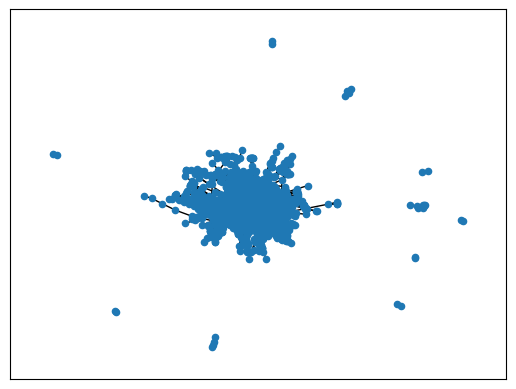

In [ ]:
print('density:', nx.density(G))
print('transitivity:', nx.transitivity(G))
print('reciprocity:', nx.reciprocity(G))

deg = nx.degree(G)
print("degree: ", deg)

#in_degree = G.in_degree()
#out_degree = G.out_degree()
#print('in-degree:', in_degree)
#print('out-degree:', out_degree)

deg_cen = nx.degree_centrality(G)
bet_cen = nx.betweenness_centrality(G)
clo_cen = nx.closeness_centrality(G)
eig_cen = nx.eigenvector_centrality(G)

nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels=False, node_size=20)

In [ ]:
G = nx.read_edgelist( "rec-movielens-user-movies-10m.edges", create_using=nx.Graph(), nodetype=int)
#이건 첫번째 행 생략이 불가해서 컬럼이 있을 땐 쓰기 애매
#그래서 csv로 읽어와서 from_pandas_edgelist로 하는게 좋음

TypeError: ignored

In [ ]:
edges = pd.read_csv('rec-movielens-user-movies-10m.edges', sep=" ")

In [ ]:
edges

,target,source,time
1,1,1,1215184630
2,2,1,1188263867
2,2,1,1188263867
2,3,1,1188263835
2,3,1,1188263835
...,...,...,...
4009,1201,1,1188263571
4009,3,1,1188263606
4009,5,1,1188263626
4009,1202,1,1188263565


In [ ]:
edges.columns =["target", "source","time"]
edges.source = edges.index

In [ ]:
G = nx.from_pandas_edgelist(edges, source='source', target='target')

In [ ]:
print(G)

Graph with 7601 nodes and 55395 edges


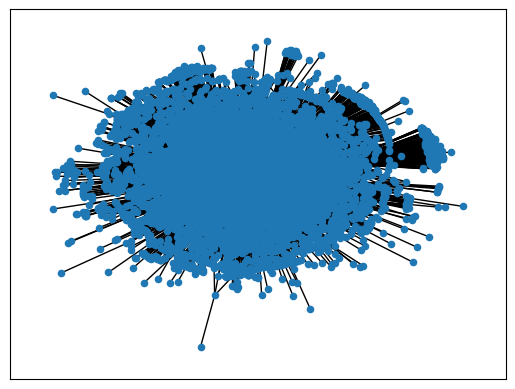

In [ ]:
nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels=False, node_size=20)